In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


df = pd.read_csv("c:\\train_1.csv")
df.head(10)


,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
6,91Days_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,7.0,33.0,8.0,11.0,4.0,15.0,6.0,8.0,6.0
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,64.0,35.0,35.0,28.0,20.0,23.0,32.0,39.0,32.0,17.0
8,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,34.0,105.0,72.0,36.0,33.0,30.0,36.0,38.0,31.0,97.0
9,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,25.0,17.0,22.0,29.0,30.0,29.0,35.0,44.0,26.0,41.0


In [2]:
# Display the first few rows of the DataFrame
df.head()

# Display basic information about the DataFrame
(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [3]:
# Check for missing values
df.isnull().sum()



Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

In [4]:
# Summary statistics
df.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,1.243230e+05,1.242470e+05,1.245190e+05,1.244090e+05,1.244040e+05,1.245800e+05,1.243990e+05,1.247690e+05,1.248190e+05,1.247210e+05,...,1.412100e+05,1.414790e+05,1.418740e+05,1.413190e+05,1.411450e+05,1.413620e+05,1.412410e+05,1.412370e+05,1.414280e+05,1.415980e+05
mean,1.195857e+03,1.204004e+03,1.133676e+03,1.170437e+03,1.217769e+03,1.290273e+03,1.239137e+03,1.193092e+03,1.197992e+03,1.189651e+03,...,1.394096e+03,1.377482e+03,1.393099e+03,1.523740e+03,1.679607e+03,1.678302e+03,1.633966e+03,1.684308e+03,1.467943e+03,1.478282e+03
std,7.275352e+04,7.421515e+04,6.961022e+04,7.257351e+04,7.379612e+04,8.054448e+04,7.576288e+04,6.820002e+04,7.149717e+04,7.214536e+04,...,8.574880e+04,7.732794e+04,8.478533e+04,8.752210e+04,9.794534e+04,9.232482e+04,9.185831e+04,9.014266e+04,8.155481e+04,8.873567e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,1.300000e+01,1.200000e+01,1.300000e+01,1.400000e+01,1.100000e+01,1.300000e+01,1.300000e+01,1.400000e+01,1.400000e+01,...,2.200000e+01,2.200000e+01,2.000000e+01,2.100000e+01,2.200000e+01,2.300000e+01,2.400000e+01,2.300000e+01,2.300000e+01,2.100000e+01
50%,1.090000e+02,1.080000e+02,1.050000e+02,1.050000e+02,1.130000e+02,1.130000e+02,1.150000e+02,1.170000e+02,1.150000e+02,1.130000e+02,...,1.490000e+02,1.430000e+02,1.320000e+02,1.450000e+02,1.600000e+02,1.620000e+02,1.630000e+02,1.600000e+02,1.540000e+02,1.360000e+02
75%,5.240000e+02,5.190000e+02,5.040000e+02,4.870000e+02,5.400000e+02,5.550000e+02,5.510000e+02,5.540000e+02,5.490000e+02,5.450000e+02,...,6.070000e+02,5.980000e+02,5.690000e+02,6.280000e+02,6.590000e+02,6.680000e+02,6.540000e+02,6.490000e+02,6.350000e+02,5.610000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,2.420108e+07,2.253925e+07,2.505662e+07,2.586575e+07,2.834288e+07,2.691699e+07,2.702505e+07,2.607382e+07,2.436397e+07,2.614954e+07


In [5]:
# Displaying the structure of the dataset (number of rows and columns)
print("Shape of the dataset:", df.shape)



Shape of the dataset: (145063, 551)


In [6]:
# Displaying the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())




First few rows of the dataset:
                                                Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09  ...  2016

In [7]:
# Displaying column names
print("\nColumn names:")
print(df.columns)




Column names:
Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=551)


In [8]:
# Displaying data types of columns
print("\nData types of columns:")
print(df.dtypes)





Data types of columns:
Page           object
2015-07-01    float64
2015-07-02    float64
2015-07-03    float64
2015-07-04    float64
               ...   
2016-12-27    float64
2016-12-28    float64
2016-12-29    float64
2016-12-30    float64
2016-12-31    float64
Length: 551, dtype: object


In [9]:
# Summary of dataset characteristics
print("\nSummary of dataset characteristics:")
print(df.info())



Summary of dataset characteristics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB
None


In [10]:

# Descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
print(df.describe())




Descriptive statistics for numerical columns:
         2015-07-01    2015-07-02    2015-07-03    2015-07-04    2015-07-05  \
count  1.243230e+05  1.242470e+05  1.245190e+05  1.244090e+05  1.244040e+05   
mean   1.195857e+03  1.204004e+03  1.133676e+03  1.170437e+03  1.217769e+03   
std    7.275352e+04  7.421515e+04  6.961022e+04  7.257351e+04  7.379612e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.300000e+01  1.300000e+01  1.200000e+01  1.300000e+01  1.400000e+01   
50%    1.090000e+02  1.080000e+02  1.050000e+02  1.050000e+02  1.130000e+02   
75%    5.240000e+02  5.190000e+02  5.040000e+02  4.870000e+02  5.400000e+02   
max    2.038124e+07  2.075219e+07  1.957397e+07  2.043964e+07  2.077211e+07   

         2015-07-06    2015-07-07    2015-07-08    2015-07-09    2015-07-10  \
count  1.245800e+05  1.243990e+05  1.247690e+05  1.248190e+05  1.247210e+05   
mean   1.290273e+03  1.239137e+03  1.193092e+03  1.197992e+03  1.189651e+03   
std 

In [11]:
#Dropping that row which has all null values which means that website is not at all visited
df= df.dropna(how='all')
print(df.shape)

(145063, 551)


In [12]:
#Dropping that rows which has more than 300 NAN values why bcz that website is newly created 
#Dropping off newly created webpages
df=df.dropna(thresh=300)
print(df.shape)

(133617, 551)


In [13]:
#Replacing NAN values with 0
df=df.fillna(method="bfill")

In [14]:
df['Page']

0                   2NE1_zh.wikipedia.org_all-access_spider
1                    2PM_zh.wikipedia.org_all-access_spider
2                     3C_zh.wikipedia.org_all-access_spider
3                4minute_zh.wikipedia.org_all-access_spider
5                   5566_zh.wikipedia.org_all-access_spider
                                ...                        
145012    Legión_(Marvel_Comics)_es.wikipedia.org_all-ac...
145013    Referéndum_sobre_la_permanencia_del_Reino_Unid...
145014    Salida_del_Reino_Unido_de_la_Unión_Europea_es....
145015    Amar,_después_de_amar_es.wikipedia.org_all-acc...
145016    Anexo:89.º_Premios_Óscar_es.wikipedia.org_all-...
Name: Page, Length: 133617, dtype: object

In [15]:
# Descriptive statistics for categorical columns
print("\nDescriptive statistics for categorical columns:")
print(df.describe(include=['object']))  # Include only object data types (categorical)




Descriptive statistics for categorical columns:
                                           Page
count                                    133617
unique                                   133617
top     2NE1_zh.wikipedia.org_all-access_spider
freq                                          1


In [16]:
# Checking for any missing values
print("\nMissing values:")
print(df.isnull().sum())



Missing values:
Page           0
2015-07-01    62
2015-07-02    62
2015-07-03    59
2015-07-04    58
              ..
2016-12-27     0
2016-12-28     0
2016-12-29     0
2016-12-30     0
2016-12-31     0
Length: 551, dtype: int64


In [17]:

# Checking for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


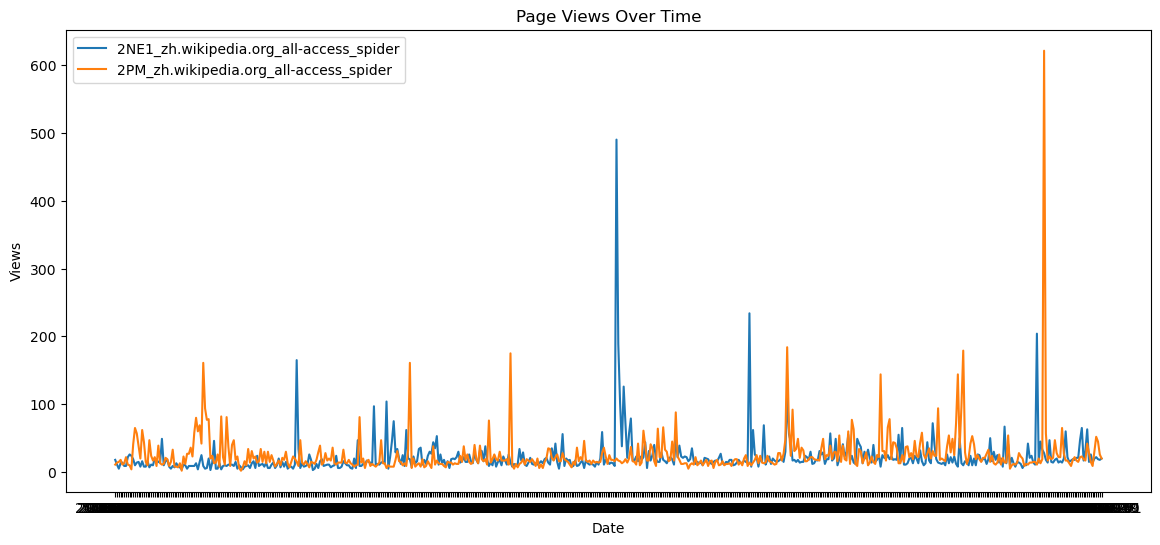

In [18]:
# Convert the data to numerical format, excluding the first column
data = df.iloc[0, 1:].astype(float)  # Example for the first page
data2 = df.iloc[1, 1:].astype(float)  # Example for the second page

# Plotting the time series data
plt.figure(figsize=(14, 6))
plt.plot(data.index, data.values, label=df.iloc[0, 0])
plt.plot(data2.index, data2.values, label=df.iloc[1, 0])
plt.xlabel('Date')
plt.ylabel('Views')
plt.title('Page Views Over Time')
plt.legend()
plt.show()


In [19]:
# Importing the dataset
exog_df = pd.read_csv("c:\\Exog_Campaign_eng.txt")
# Displaying the first few rows of the dataset
print("\nFirst few rows of the Exog_Campaign_eng dataset:")
exog_df.head()

# Displaying column names
print("\nColumn names:")
(exog_df.columns)

# Displaying data types of columns
print("\nData types of columns:")
(exog_df.dtypes)

# Summary of dataset characteristics
print("\nSummary of dataset characteristics:")
(exog_df.info())

# Descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
(exog_df.describe())



First few rows of the Exog_Campaign_eng dataset:

Column names:

Data types of columns:

Summary of dataset characteristics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Exog    550 non-null    int64
dtypes: int64(1)
memory usage: 4.4 KB

Descriptive statistics for numerical columns:


,Exog
count,550.000000
mean,0.098182
std,0.297831
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [20]:
# Splitting the page name to get different information
split_cols = df['Page'].str.split('_', n=3, expand=True)
split_cols.columns = ['Page', 'Language', 'Access_Type', 'Access_Origin']
df[['Page', 'Language', 'Access_Type', 'Access_Origin']] = split_cols
split_cols


,Page,Language,Access_Type,Access_Origin
0,2NE1,zh.wikipedia.org,all-access,spider
1,2PM,zh.wikipedia.org,all-access,spider
2,3C,zh.wikipedia.org,all-access,spider
3,4minute,zh.wikipedia.org,all-access,spider
5,5566,zh.wikipedia.org,all-access,spider
...,...,...,...,...
145012,Legión,(Marvel,Comics),es.wikipedia.org_all-access_spider
145013,Referéndum,sobre,la,permanencia_del_Reino_Unido_en_la_Unión_Europe...
145014,Salida,del,Reino,Unido_de_la_Unión_Europea_es.wikipedia.org_all...
145015,"Amar,",después,de,amar_es.wikipedia.org_all-access_spider


In [21]:
# Modeling with ARIMA
def fit_arima(ts):
    model = ARIMA(ts, order=(5,1,0))
    model_fit = model.fit()
    return model_fit

In [22]:
# Forecasting with ARIMA
def forecast_arima(model, steps):
    forecast = model.forecast(steps=steps)
    return forecast

In [23]:
# Forecasting with ARIMA
def forecast_arima(model, steps):
    forecast = model.forecast(steps=steps)
    return forecast

# Parameter Grid for SARIMAX
param_grid = {
    'order': [(1, 1, 0), (1, 1, 1)],
    'seasonal_order': [(0, 0, 0, 0), (1, 0, 0, 7)]
}
grid = ParameterGrid(param_grid)

best_aic = np.inf
best_params = None

for params in grid:
    try:
        model = SARIMAX(train_df.iloc[0, :].values[1:], exog=exog_campaign_df['Exog'], **params)
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_params = params
    except:
        continue

print('Best AIC:', best_aic)
print('Best Params:', best_params)



Best AIC: inf
Best Params: None


In [24]:
def fit_arima(train, test, exog_train=None, exog_test=None, order=(1, 1, 0)):
    # Fit ARIMA model
    model = ARIMA(train, exog=exog_train, order=order)
    model_fit = model.fit()



In [25]:
# Check for None values in exog_df['Exog'] column
print("Number of None values in Exog column:", exog_df['Exog'].isnull().sum())

# Replace None values with 0
exog_df['Exog'] = exog_df['Exog'].fillna(0)

# Convert Exog column to int64
exog_df['Exog'] = exog_df['Exog'].astype('int64')


Number of None values in Exog column: 0


In [26]:
endog = df['Page'].values
endog


array(['2NE1', '2PM', '3C', ..., 'Salida', 'Amar,', 'Anexo:89.º'],
      dtype=object)

In [27]:
def fit_arima(train, test, exog_train=None, exog_test=None, order=(1, 1, 0)):
    # Fit ARIMA model
    model = ARIMA(train, exog=exog_train, order=order)
    model_fit = model.fit()


In [28]:
# Assuming 'df' is your original dataframe
train_size = int(len(df) * 0.8)  # Use 80% of the data for training
train, test = df.iloc[:train_size], df.iloc[train_size:]


In [29]:
# Define parameters for grid search
p = d = q = range(0, 3)
pdq = list(ParameterGrid({'p': p, 'd': d, 'q': q}))
# Grid search for best parameters
for param in pdq:
    try:
        model = ARIMA(timeseries, order=(param['p'], param['d'], param['q']))
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = param
    except:
        continue


In [30]:
# Splitting the 'Page' column into separate columns
temp_cols = df['Page'].str.extract(r'^(.*?)_(.*?)\.(.*?)_(.*?)_(.*)$')

# Renaming the columns for clarity
temp_cols.columns = ['Page_title', 'Language', 'Access_Type', 'Access_Origin_1', 'Access_Origin_2']

# Combining 'Access_Origin_1' and 'Access_Origin_2' into 'Access_Origin'
temp_cols['Access_Origin'] = temp_cols['Access_Origin_1'] + '_' + temp_cols['Access_Origin_2']

# Dropping the intermediate columns
temp_cols.drop(columns=['Access_Origin_1', 'Access_Origin_2'], inplace=True)

# Combining the extracted columns with the original DataFrame
df = pd.concat([df, temp_cols], axis=1)

# Dropping the original 'Page' column
df.drop(columns=['Page'], inplace=True)



In [ ]:
df

In [ ]:
df_pivot = df.set_index('Page_title').T
total_views.index = total_views.index.astype(int)
total_views.index = pd.to_datetime(total_views.index, format='%Y%m%d')





In [155]:
plt.figure(figsize=(14, 6))
total_views = df_pivot.sum(axis=0)[1:]  # Summing the views for all pages for each date
total_views.index = pd.to_datetime(total_views.index)  # Converting the index to datetime
plt.plot(total_views.index, total_views.values, marker='o', linestyle='-')
plt.title('Total Wikipedia Page Views Over Time')
plt.xlabel('Date')
plt.ylabel('Total Views')
plt.grid(True)
plt.show()


C:\Users\criss\AppData\Local\Temp\ipykernel_17828\3016348978.py:2: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  total_views = df_pivot.sum(axis=0)[1:]  # Summing the views for all pages for each date


TypeError: Cannot convert Float64Index to dtype datetime64[ns]; integer values are required for conversion

<Figure size 1400x600 with 0 Axes>